In [1]:
#Loading all the necessary libraries for the Deep learning model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense, add
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

Using TensorFlow backend.


In [2]:
#Import the car data stored as an iage into the Python notebook
car_data = pd.read_csv("data.csv")
car_data.shape

(11914, 16)

In [3]:
#we have chosen only the car details for the rows that have non empty cells
car_data = car_data.dropna()
car_data.shape

(8084, 16)

In [4]:
#We create the dummies for all the categorical string variable to build a numberical database
dummy1 = pd.get_dummies(car_data["Make"], prefix='Make')
dummy2 = pd.get_dummies(car_data["Model"], prefix='Model')
dummy3 = pd.get_dummies(car_data["Engine Fuel Type"], prefix='EFT')
dummy4 = pd.get_dummies(car_data["Transmission Type"], prefix='TNT')
dummy5 = pd.get_dummies(car_data["Driven_Wheels"], prefix='DRW')
dummy6 = pd.get_dummies(car_data["Market Category"], prefix='MTC')
dummy7 = pd.get_dummies(car_data["Vehicle Size"], prefix='VSZ')
dummy8 = pd.get_dummies(car_data["Vehicle Style"], prefix='VST')

In [5]:
#After creating the dummies, we concatenate all the dataframe into consolidated dataframe
car_dummy = pd.concat((dummy1, dummy2, dummy3, dummy4, dummy5, dummy6, dummy7, dummy8), axis=1)

In [6]:
#Now we concatenate the main dataframe, with the consolidated dummy variable dataframe
car_data_final = pd.concat((car_data, car_dummy), axis=1)

In [7]:
#Dropping redundant columns creating bias to the dataset created
car_data_f = car_data_final.drop(columns={'Make_Oldsmobile', 'Model_RS 6', 'EFT_electric', 'TNT_UNKNOWN', 'DRW_four wheel drive',
                                          'MTC_Exotic,Luxury,High-Performance,Hybrid', 'VSZ_Large', 'VST_Cargo Minivan',
                                          'Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels',
                                          'Market Category', 'Vehicle Size', 'Vehicle Style'})

In [8]:
#final shape of the cars price prediction dataset
car_data_f.shape

(8084, 866)

In [9]:
# we move the target column to the end of the dataframe
cols = list(car_data_f.columns.values)
cols.pop(cols.index('MSRP'))
car_data_exe = car_data_f[cols+['MSRP']]

In [10]:
#we have analysed all the correlation between the different columns created. 
corp = car_data_exe.iloc[:,0:865].corr()

#There is no to be worrried positive or negative correlation between any two columns

In [11]:
#Creating a numpy array for Neural Network configuration
car_dat = np.array(car_data_exe)
X = car_dat[:,0:865]
y = car_dat[:,865:866]

#We have not scaled the dataset as the direct implcation of verious important parameters are not captured when scaled down.
#Hence we use the dataset with its original values. 

#Splitting the independent and the dependent variable into the training and the test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Shape of the train and the test array
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5416, 865) (2668, 865) (5416, 1) (2668, 1)


In [12]:
#Creating the Fully connected Neural network for training the model into 7 different hidden layers of 2^n nodes. We use the most
#common activation method ""ReLu" to have the maximum training of the NN over the model. As we are working on the preiction
#model we finally use 1 node final output layer with the activation of "linear" mode.

model = Sequential()
model.add(Dense(128, input_dim=865, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='linear'))

#We then compile the model with the loss factor of multiple linear regression being the "MSE" and we use one of the most
#effective linear model optimizer "rmsprop"
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [13]:
#We then finally fit the model with the training dataset, with validation spilt being kept at 20% of the training dataset.
H1 = model.fit(X_train, y_train, verbose=1, epochs=500, batch_size=100, validation_split=0.2)

Train on 4332 samples, validate on 1084 samples
Epoch 1/500
4332/4332 [==============================] - 1s 226us/step - loss: 7928222876.3657 - val_loss: 3909876368.0590
Epoch 2/500
4332/4332 [==============================] - 0s 62us/step - loss: 6247564040.5097 - val_loss: 3265988799.0554
Epoch 3/500
4332/4332 [==============================] - 0s 61us/step - loss: 5847257973.9538 - val_loss: 2997522029.8155
Epoch 4/500
4332/4332 [==============================] - 0s 58us/step - loss: 5608801866.2235 - val_loss: 2825104431.9410
Epoch 5/500
4332/4332 [==============================] - 0s 62us/step - loss: 5409946505.3370 - val_loss: 2642993719.2620
Epoch 6/500
4332/4332 [==============================] - 0s 71us/step - loss: 5103242193.4331 - val_loss: 2357289237.7269
Epoch 7/500
4332/4332 [==============================] - 0s 62us/step - loss: 4677788636.2179 - val_loss: 1986477401.2694
Epoch 8/500
4332/4332 [==============================] - 0s 60us/step - loss: 4224772758.2789 - v

Epoch 134/500
4332/4332 [==============================] - 0s 58us/step - loss: 1103479218.8218 - val_loss: 830576572.3395
Epoch 135/500
4332/4332 [==============================] - 0s 59us/step - loss: 1130742635.5014 - val_loss: 713393044.6642
Epoch 136/500
4332/4332 [==============================] - 0s 59us/step - loss: 1134187224.7904 - val_loss: 592790345.2694
Epoch 137/500
4332/4332 [==============================] - 0s 60us/step - loss: 1132550394.1939 - val_loss: 612221256.7970
Epoch 138/500
4332/4332 [==============================] - 0s 57us/step - loss: 1113739754.4451 - val_loss: 592904539.7491
Epoch 139/500
4332/4332 [==============================] - 0s 61us/step - loss: 1140967542.2936 - val_loss: 784259794.7749
Epoch 140/500
4332/4332 [==============================] - 0s 60us/step - loss: 1153708003.7673 - val_loss: 598274428.2214
Epoch 141/500
4332/4332 [==============================] - 0s 59us/step - loss: 1128597587.7673 - val_loss: 614634118.0221
Epoch 142/500
43

Epoch 201/500
4332/4332 [==============================] - 0s 58us/step - loss: 962438678.1976 - val_loss: 427609066.6273
Epoch 202/500
4332/4332 [==============================] - 0s 63us/step - loss: 943066117.7322 - val_loss: 455067258.8044
Epoch 203/500
4332/4332 [==============================] - 0s 65us/step - loss: 957613110.9806 - val_loss: 470597864.7970
Epoch 204/500
4332/4332 [==============================] - 0s 65us/step - loss: 928145026.6150 - val_loss: 442525884.3395
Epoch 205/500
4332/4332 [==============================] - 0s 60us/step - loss: 907548255.6898 - val_loss: 440126435.2177
Epoch 206/500
4332/4332 [==============================] - 0s 58us/step - loss: 928050252.6057 - val_loss: 479961337.7122
Epoch 207/500
4332/4332 [==============================] - 0s 60us/step - loss: 853832008.0000 - val_loss: 448716960.6494
Epoch 208/500
4332/4332 [==============================] - 0s 58us/step - loss: 922602001.6620 - val_loss: 442679219.1882
Epoch 209/500
4332/4332 

4332/4332 [==============================] - 0s 59us/step - loss: 769582095.0102 - val_loss: 314940565.4908
Epoch 269/500
4332/4332 [==============================] - 0s 59us/step - loss: 711612662.8957 - val_loss: 320261710.4059
Epoch 270/500
4332/4332 [==============================] - 0s 60us/step - loss: 798931353.2336 - val_loss: 371270206.7306
Epoch 271/500
4332/4332 [==============================] - 0s 56us/step - loss: 811719701.4515 - val_loss: 370966370.1107
Epoch 272/500
4332/4332 [==============================] - 0s 61us/step - loss: 755454063.6380 - val_loss: 317557178.0664
Epoch 273/500
4332/4332 [==============================] - 0s 59us/step - loss: 734118486.3490 - val_loss: 377974623.4982
Epoch 274/500
4332/4332 [==============================] - 0s 59us/step - loss: 770103419.1283 - val_loss: 322250930.0369
Epoch 275/500
4332/4332 [==============================] - 0s 56us/step - loss: 801896014.4044 - val_loss: 294304072.4723
Epoch 276/500
4332/4332 [=============

Epoch 335/500
4332/4332 [==============================] - 0s 56us/step - loss: 648256177.2410 - val_loss: 372080084.8561
Epoch 336/500
4332/4332 [==============================] - 0s 66us/step - loss: 671266950.9954 - val_loss: 272328258.1402
Epoch 337/500
4332/4332 [==============================] - 0s 60us/step - loss: 657578321.0157 - val_loss: 252014630.4945
Epoch 338/500
4332/4332 [==============================] - 0s 58us/step - loss: 691092523.5088 - val_loss: 282401364.8266
Epoch 339/500
4332/4332 [==============================] - 0s 60us/step - loss: 632238124.4026 - val_loss: 257907517.7417
Epoch 340/500
4332/4332 [==============================] - 0s 59us/step - loss: 670077610.6039 - val_loss: 403648657.2989
Epoch 341/500
4332/4332 [==============================] - 0s 55us/step - loss: 637932782.0794 - val_loss: 241228842.0664
Epoch 342/500
4332/4332 [==============================] - 0s 68us/step - loss: 687242882.9991 - val_loss: 538891220.3690
Epoch 343/500
4332/4332 

Epoch 402/500
4332/4332 [==============================] - 0s 64us/step - loss: 635055149.5291 - val_loss: 376604169.7417
Epoch 403/500
4332/4332 [==============================] - 0s 59us/step - loss: 509445953.0748 - val_loss: 236544181.6089
Epoch 404/500
4332/4332 [==============================] - 0s 58us/step - loss: 549716062.2050 - val_loss: 644881491.2472
Epoch 405/500
4332/4332 [==============================] - 0s 59us/step - loss: 536716226.9695 - val_loss: 240692186.2731
Epoch 406/500
4332/4332 [==============================] - 0s 57us/step - loss: 524481687.8633 - val_loss: 233168741.4760
Epoch 407/500
4332/4332 [==============================] - 0s 58us/step - loss: 576455428.7387 - val_loss: 237416633.1070
Epoch 408/500
4332/4332 [==============================] - 0s 57us/step - loss: 590135968.2142 - val_loss: 228447938.0664
Epoch 409/500
4332/4332 [==============================] - 0s 59us/step - loss: 588507124.3583 - val_loss: 299188189.8007
Epoch 410/500
4332/4332 

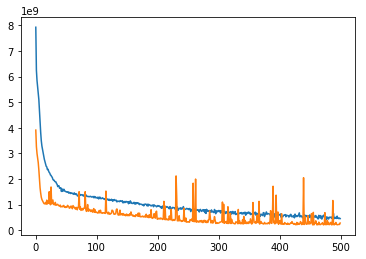

In [15]:
# We plot the loss function (MSE) for both the actual training model and the validation dataset
plt.plot(H1.history["loss"])
plt.plot(H1.history["val_loss"])
plt.show()

In [17]:
#The final evaluation score for the predicted ANN is around 52.03% with the above model
print("The MSE value for the model:", model.evaluate(X_test, y_test))
y_pred = model.predict(X_test)
print("The accuracy of the model:", np.mean(np.abs(1-y_pred/y_test)))

#We then calculate using the formula to calcualte the RMSE value
rms1 = sqrt(mean_squared_error(y_test, y_pred))
rms1

2668/2668 [==============================] - 0s 48us/step
268870483.04347825
The accuracy of the model: 0.5203332989613565


16397.270555592895

In [20]:
#The above model is not so accurate, hence we increase the intital door hidden layer node to be more than the input dimension
# of 865, then we run the same process as above for the much DNN.

model1 = Sequential()
model1.add(Dense(1024, input_dim=865, kernel_initializer='normal', activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(2, activation='relu'))
model1.add(Dense(1, activation='linear'))

model1.compile(loss='mean_squared_error', optimizer='rmsprop')

In [21]:
H2 = model1.fit(X_train, y_train, verbose=1, epochs=500, batch_size=100, validation_split=0.2)

Train on 4332 samples, validate on 1084 samples
Epoch 1/500
4332/4332 [==============================] - 4s 884us/step - loss: 8567774020.7867 - val_loss: 5751432738.0074
Epoch 2/500
4332/4332 [==============================] - 2s 560us/step - loss: 8567226822.5596 - val_loss: 5751428445.5203
Epoch 3/500
4332/4332 [==============================] - 2s 573us/step - loss: 8567222143.8818 - val_loss: 5751424503.4982
Epoch 4/500
4332/4332 [==============================] - 2s 564us/step - loss: 8567218392.9972 - val_loss: 5751419392.0000
Epoch 5/500
4332/4332 [==============================] - 3s 582us/step - loss: 8567213454.0646 - val_loss: 5751415280.8856
Epoch 6/500
4332/4332 [==============================] - 2s 566us/step - loss: 8567209276.2770 - val_loss: 5751410795.6900
Epoch 7/500
4332/4332 [==============================] - 2s 575us/step - loss: 8567204968.7165 - val_loss: 5751406759.2030
Epoch 8/500
4332/4332 [==============================] - 2s 572us/step - loss: 8567200098.9

Epoch 132/500
4332/4332 [==============================] - 3s 600us/step - loss: 8566655343.0988 - val_loss: 5750862508.8708
Epoch 133/500
4332/4332 [==============================] - 3s 603us/step - loss: 8566650938.1496 - val_loss: 5750858614.0812
Epoch 134/500
4332/4332 [==============================] - 3s 614us/step - loss: 8566646742.3970 - val_loss: 5750854058.0369
Epoch 135/500
4332/4332 [==============================] - 3s 608us/step - loss: 8566642151.1801 - val_loss: 5750849722.0959
Epoch 136/500
4332/4332 [==============================] - 3s 610us/step - loss: 8566637932.3804 - val_loss: 5750845567.5277
Epoch 137/500
4332/4332 [==============================] - 3s 612us/step - loss: 8566633407.3500 - val_loss: 5750840893.4022
Epoch 138/500
4332/4332 [==============================] - 3s 623us/step - loss: 8566628907.6122 - val_loss: 5750836738.8339
Epoch 139/500
4332/4332 [==============================] - 3s 627us/step - loss: 8566624639.6454 - val_loss: 5750832517.1956


4332/4332 [==============================] - 2s 562us/step - loss: 8566083901.9317 - val_loss: 5750296875.4539
Epoch 263/500
4332/4332 [==============================] - 2s 564us/step - loss: 8566079661.0305 - val_loss: 5750292909.8155
Epoch 264/500
4332/4332 [==============================] - 2s 562us/step - loss: 8566074716.1884 - val_loss: 5750288522.8635
Epoch 265/500
4332/4332 [==============================] - 2s 560us/step - loss: 8566070608.8421 - val_loss: 5750283876.1328
Epoch 266/500
4332/4332 [==============================] - 2s 575us/step - loss: 8566066084.0480 - val_loss: 5750279603.4834
Epoch 267/500
4332/4332 [==============================] - 2s 556us/step - loss: 8566061696.8273 - val_loss: 5750275074.8339
Epoch 268/500
4332/4332 [==============================] - 2s 573us/step - loss: 8566057290.6962 - val_loss: 5750270943.8819
Epoch 269/500
4332/4332 [==============================] - 2s 573us/step - loss: 8566053023.3204 - val_loss: 5750266509.6974
Epoch 270/500


4332/4332 [==============================] - 3s 653us/step - loss: 8565512585.3370 - val_loss: 5749731572.6642
Epoch 393/500
4332/4332 [==============================] - 3s 615us/step - loss: 8565508052.9788 - val_loss: 5749727016.6199
Epoch 394/500
4332/4332 [==============================] - 3s 589us/step - loss: 8565503392.0295 - val_loss: 5749722936.6790
Epoch 395/500
4332/4332 [==============================] - 3s 602us/step - loss: 8565499267.3093 - val_loss: 5749718219.0996
Epoch 396/500
4332/4332 [==============================] - 2s 577us/step - loss: 8565494817.0933 - val_loss: 5749714048.4723
Epoch 397/500
4332/4332 [==============================] - 3s 580us/step - loss: 8565490313.1006 - val_loss: 5749709701.1956
Epoch 398/500
4332/4332 [==============================] - 2s 575us/step - loss: 8565485993.2484 - val_loss: 5749705054.4649
Epoch 399/500
4332/4332 [==============================] - 2s 574us/step - loss: 8565481357.1191 - val_loss: 5749701132.2804
Epoch 400/500


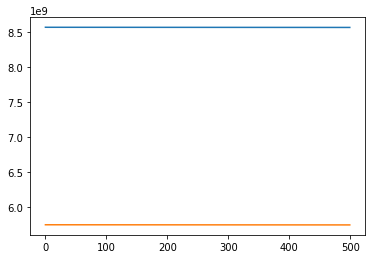

In [23]:
#The MSE value of the training and the validation dataset has steadily decreased, as the values are huge, not visible in graph
import matplotlib.pyplot as plt
plt.plot(H2.history["loss"])
plt.plot(H2.history["val_loss"])
plt.show()

In [25]:
#With the new model we calculate the accuracy of the predicted price value and the actual price value for the test dataset, 
#and it is around 99.8% accurate.

print(model1.evaluate(X_test, y_test))
y_pred1 = model1.predict(X_test)
print("The accuracy of the model:", np.mean(np.abs(1-y_pred1/y_test)))

from sklearn.metrics import mean_squared_error
from math import sqrt

rms2 = sqrt(mean_squared_error(y_test, y_pred1))
rms2

2668/2668 [==============================] - 1s 243us/step
6317227014.140929
The accuracy of the model: 0.9986640944443055


79480.98564466767